<a href="https://colab.research.google.com/github/ozturkc/Machine-Learning/blob/master/Do%C4%9Frusal_Regresyon_%C3%87al%C4%B1%C5%9Fma_Dosyas%C4%B1_ipynb_adl%C4%B1_dosyan%C4%B1n_kopyas%C4%B1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <h1 align="center"> Numpy Kütüphanesi Kullanarak Doğrusal Regresyon Uygulaması </h1>

---
<h3 align=center>(Linear Regression)</h3>

---

Makine öğrenmesine giriş seviyesindeki ilk adımınız **doğrusal regresyon** olabilir. **Regresyon** Türkçeye **bağlanım** olarak çevrilmiştir. Ancak genellikle regresyon kullanıldığı için bu çalışmada bu şekilde kullanmaya devam edeceğim. Matematiksel olarak kolay anlaşılır ve istatistiksel temelli bu model ile günlük hayatta bir çok konuda tahminleme yapma imkannı bulursunuz.

---

***Eğilim ve yönelimler, satış tahminleme, sigorta risk analizleri sık kullanıldıkları alanlardır.***

---

Elinizdeki en basitinden iki değişkenli verinin bir değişkeninin değerini diğerine bağlı olarak tahmin edebilirsiniz. Tahmin etmek için kullandığınız değişken **bağımsız**, tahmin etmek istediğiniz değişken ise **bağımlı** değişkendir. Bu tahminlemenin mümkün olduğu koşullarda doğrusal regresyon kullanabilirsiniz. 

* Ancak unutmamalı ki bağımlı ve bağımsız değişkenler nicel olmalıdır. Bağılmı değişkenin dağılımı her bağımsız değişken değeri için normal dağılıma sahip olması beklenir. Aralarındaki ilişki de doğrusal olmalıdır. Bu varsayımların bazıları sağlanmadığında farklı regresyon teknikleri uygulanabilir. 


* Tahmin etmek istediğiniz bağımlı değişkeni öngören birden fazla da bağımsız değişkeniniz olabilir. Burada doğrusal denklemin katsayıları tahmin edilerek analiz gerçekleştirirsiniz. 

* Tahminleme yaparken bir maliyet fonksiyonu tanımlanır ve bunu minimize ederek en iyi tahminleme yapılmaya çalışılır. Aşağıdaki temsili grafikten de anlayacağınız gibi maliyet fonksiyonu minimize edilirken doğrusal regresyon veri dağılımına fit eder.

![doğrusal regresyon](https://miro.medium.com/max/2400/1*AsfV2NelG1Ta5F-0kr727w.gif)

---

### Bu çalışmada da tam olarak böyle bir örneği adım adım gerçekleştireceğiz.

**Çalışma için seçtiğimiz veri ve problem:** Doğrusal regresyon örneklemesinde çok kullanılan bir veri kümesini kullanacağız. Gıda taşımacılığı yapan bir kamyonun kâr kestirimini yapmaya çalışacağız. 

* İki sütundan oluşan bir veri kümemiz var ve ilk sütun şehirlerin popülasyonu hakkında bilgileri barındırırken ikinci sütun kamyonun kâr bilgisini barındırmaktadır. Bağımlı değişkenimiz bu kâr bilgisi olacak yani bunu doğrusal regresyonla bulmak istiyoruz. 

<h4 align=center> Hadi başlayalım!!!

![](https://media.giphy.com/media/liouol4vPRdDO/giphy.gif) </h4>






### Google Colab Kimlik Doğrulama İşlemleri 

Bu çalışma için GPU seçimi yapmanıza gerek yoktur. Ancak Drivedaki dosyalarınıza erişmeniz gerekir.

In [1]:
#GPU kullanmak için kimlik doğrulama işlemi
from google.colab import drive
drive.mount('/gdrive')
#%cd /gdrive

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive


In [5]:
!pwd

/content


In [4]:
!ls

sample_data


In [6]:
!ls "/gdrive/My Drive/DogrusalRegresyon/"

'Doğrusal Regresyon Çalışma Dosyası.ipynb adlı dosyanın kopyası'
 gida_kamyon_verisi.txt
'Original of Doğrusal Regresyon Çalışma Dosyası.ipynb adlı dosyanın kopyası'


In [7]:
import os
os.chdir("/gdrive/My Drive/DogrusalRegresyon/")

In [8]:
!pwd

/gdrive/My Drive/DogrusalRegresyon


In [9]:
!ls

'Doğrusal Regresyon Çalışma Dosyası.ipynb adlı dosyanın kopyası'
 gida_kamyon_verisi.txt
'Original of Doğrusal Regresyon Çalışma Dosyası.ipynb adlı dosyanın kopyası'


### 1.Adım: Verileri ve Kütüphaneleri Yüklemek
---

In [10]:
import matplotlib.pyplot as plt 
plt.style.use('ggplot')
%matplotlib inline

In [11]:
import numpy as np
import pandas as pd  
import seaborn as sns 
plt.rcParams['figure.figsize'] = (10, 6)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [12]:
data = pd.read_csv("gida_kamyon_verisi.txt")
data.head(10)

,Populasyon,Kâr
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233
5,8.3829,11.8860
6,7.4764,4.3483
7,8.5781,12.0000
8,6.4862,6.5987
9,5.0546,3.8166


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Populasyon  97 non-null     float64
 1   Kâr         97 non-null     float64
dtypes: float64(2)
memory usage: 1.6 KB


### 2.Adım: Verileri Görselleştirme
---

Bu örnekte gördüğümüz verilerin noktalar halinde görselini çizdiriyoruz. Her bir nokta bir boyutlu özniteliklerdir. 


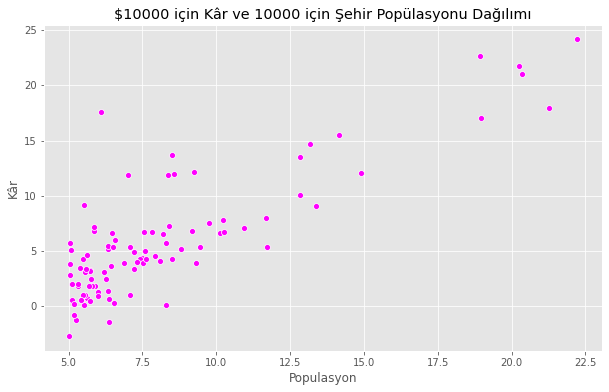

In [14]:
ax = sns.scatterplot(x='Populasyon', y='Kâr', color='magenta', data=data)
ax.set_title("$10000 için Kâr ve 10000 için Şehir Popülasyonu Dağılımı");

### 3.Adım: Maliyet Fonksiyonunun Hesaplanması $J(\theta)$
---



Doğrusal regresyonun amacı, $h_{\theta}(x)$ hipotezi için doğrusal model tarafından verilen maliyet fonksiyonunu minimize etmektir.

$$h_{\theta}(x) = \theta^Tx = \theta_0 + \theta_1x_1$$

$$J(\theta) = \frac{1}{2m} \sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)} )^2$$




In [ ]:
def cost_function(X, y, theta):
    m = len(y)
    y_pred = X.dot(theta)
    error = (y_pred - y) ** 2
    
    return 1 / (2 * m) * np.sum(error)

In [ ]:
m = data.Populasyon.values.size
# kesişim terimini tutmak için başka bir boyut ekleyin ve bunu tüm boyutlara ayarlayın
X = np.append(np.ones((m, 1)), data.Populasyon.values.reshape(m, 1), axis=1)
y = data.Kâr.values.reshape(m, 1)
theta = np.zeros((2,1))

cost_function(X, y, theta)

32.072733877455676

### 4.Adım: Gradyan İniş Hesabı (Gradient Descent)
---


Aşağıdaki denklemi güncelleyerek $J(\theta)$ maliyet fonksiyonunu en aza indirin ve yakınsamaya kadar tekrarlayın.
        
$\theta_j := \theta_j - \alpha \frac{1}{m} \sum_{i=1}^m (h_{\theta}(x^{(i)}) - y^{(i)})x_j^{(i)}$ (eşzamanlı olarak tüm $j$ için $\theta_j$'yi güncelleyin).

In [ ]:
def gradient_descent(X, y, theta, alpha, iterations): 
    m = len(y)
    costs = []
    for i in range(iterations):
        y_pred = X.dot(theta)
        error = np.dot(X.transpose(), (y_pred - y))
        theta -= alpha * 1/m * error #model güncellemesi bu denklemle yapılır
        costs.append(cost_function(X, y, theta))
        
    return theta, costs

In [ ]:
theta, costs = gradient_descent(X, y, theta, alpha=0.01, iterations=10000)

print("h(x) = {} + {}x1".format(str(round(theta[0, 0], 2)),
                                str(round(theta[1, 0], 2))))

h(x) = -3.9 + 1.19x1


In [ ]:
costs[9999]

4.476971375975179

### 5.Adım: Maliyet Fonksiyonunun Görselleştirilmesi $J(\theta)$
---

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
theta_0 = np.linspace(-10,10,100)
theta_1 = np.linspace(-1,4,100)

cost_values = np.zeros((len(theta_0), len(theta_1)))

for i in range(len(theta_0)):
    for j in range(len(theta_1)):
        t = np.array([theta_0[i], theta_1[j]])
        cost_values[i, j] = cost_function(X, y, t)

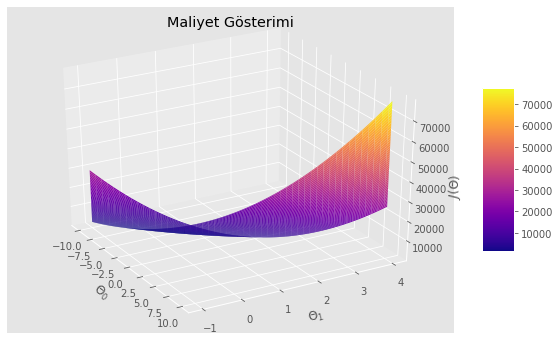

In [ ]:
fig = plt.figure(figsize = (10, 6))
ax = fig.gca(projection = '3d')

surf = ax.plot_surface(theta_0, theta_1, cost_values, cmap = "plasma", linewidth = 0.2)
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.xlabel("$\Theta_0$")
plt.ylabel("$\Theta_1$")
ax.set_zlabel("$J(\Theta)$")
ax.set_title("Maliyet Gösterimi")
ax.view_init(30,330)

plt.show()

### 6.Adım: Yakınsama Grafiğinin Oluşturulması
---

Gradyan iniş iterasyon sayısına karşı `-Maliyet Fonksiyonunu-` J (θ)'nin çizdirilmesi:

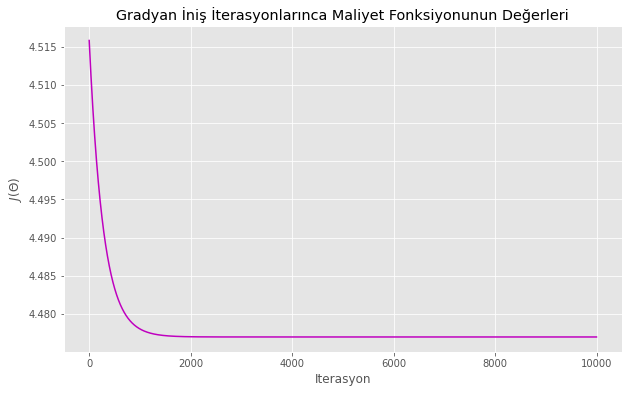

In [ ]:
plt.plot(costs, 'm')
plt.xlabel("Iterasyon")
plt.ylabel("$J(\Theta)$")
plt.title("Gradyan İniş İterasyonlarınca Maliyet Fonksiyonunun Değerleri");

### 7.Adım: Eğitim Verileri ile Doğrusal Regresyon
---

Doğrusal regresyon doğrusu tüm verilere en yakın optimal uzaklıktan geçecek şekilde öğrenilmiş olur.

In [ ]:
theta.shape # thetanın boyutları

(2, 1)

In [ ]:
theta #thetanın içeriği

array([[-3.89578087],
       [ 1.19303364]])

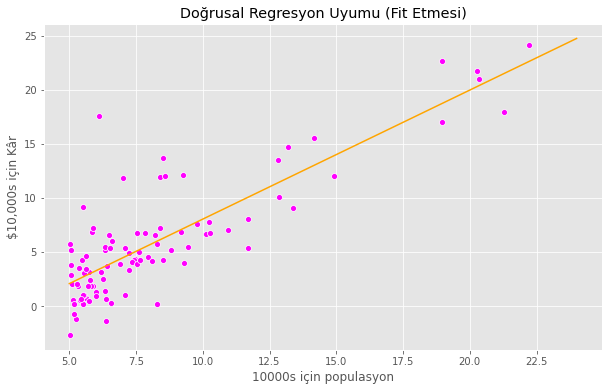

In [ ]:
theta = np.squeeze(theta)
sns.scatterplot(x = "Populasyon", y= "Kâr", color='magenta', data = data)

x_value=[x for x in range(5, 25)]
y_value=[(x * theta[1] + theta[0]) for x in x_value]
sns.lineplot(x_value,y_value, color="orange")

plt.xlabel("10000s için populasyon")
plt.ylabel("$10,000s için Kâr")
plt.title("Doğrusal Regresyon Uyumu (Fit Etmesi)");

### 8.Adım: Optimize edilmiş $\theta$ değerlerini kullanarak çıkarım
---

$h_\theta(x) = \theta^Tx$

In [ ]:
def predict(x, theta):
    y_pred = np.dot(theta.transpose(), x)
    return y_pred

Eğitilen modeli kestirim/tahmin yapmak için kullanalım.
- 50000 populasyon için olası kar değeri 
- 23000 populasyon için olası kar değeri

In [ ]:
y_pred_1 = predict(np.array([1, 5]),theta) * 10000
print("50,000 kişilik bir nüfus için modelin ön gördüğü kar: $" + str(round(y_pred_1, 0)))

50,000 kişilik bir nüfus için modelin ön gördüğü kar: $23951.0


In [ ]:
y_pred_2 = predict(np.array([1, 2.3]), theta) * 10000
print("23.000 kişilik bir nüfus için modelin ön gördüğü kar: $" +str(round(y_pred_2, 0)))

23.000 kişilik bir nüfus için modelin ön gördüğü kar: $-6486.0


### SONUÇ

Bu çalışma için şehir populasyonuna bağlı olarak gıda taşıyıcısı kamyonun kâr durumunun tahminlemesi üzerine doğrusal bir regresyon örneğini deneyimlemiş olduk. Bunu yaparken Python programlama dilini ve Numpy kütüphanesinden faydalandık. 

Doğrusal regresyon anlaşılabilirliği, daha karmaşık olan sinir ağları veya parametre ayarlaması gerektiren makine öğrenmesi yaklaşımlarına göre matematiksel olarak basit olması ve hızı bakımından çok tercih edilir. 

![done](https://media.giphy.com/media/SfYTJuxdAbsVW/giphy.gif)

---

### KAYNAKLAR:

*   [Coursera Course: Machine Learning by Andrew Ng](https://www.coursera.org/learn/machine-learning)
*   [Coursera Course: Linear Regression with NumPy and Python](https://www.coursera.org/projects/linear-regression-numpy-python)
*   [Predict Profit for food truck](https://github.com/girishkuniyal/Predict-Profit-for-food-truck)
*   [Linear Regression — Detailed View](https://towardsdatascience.com/linear-regression-detailed-view-ea73175f6e86)